# Redes Neurais Artificiais

### Neuronio Biologico

In [165]:
from IPython.display import Image, display
from IPython.core.display import HTML
display(Image(url = "http://www.scielo.br/img/revistas/rbef/v37n2//0102-4744-rbef-37-02-2310-gf01.jpg", width=600, height=450))

### Perceptron

In [34]:
display(Image(url = "https://www.gsigma.ufsc.br/~popov/aulas/rna/neuronio_artificial/neuronio_artificial.jpg", width=800, height=650))

In [164]:
Image(url = "http://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019.png")

#### Funcao Sigmoide

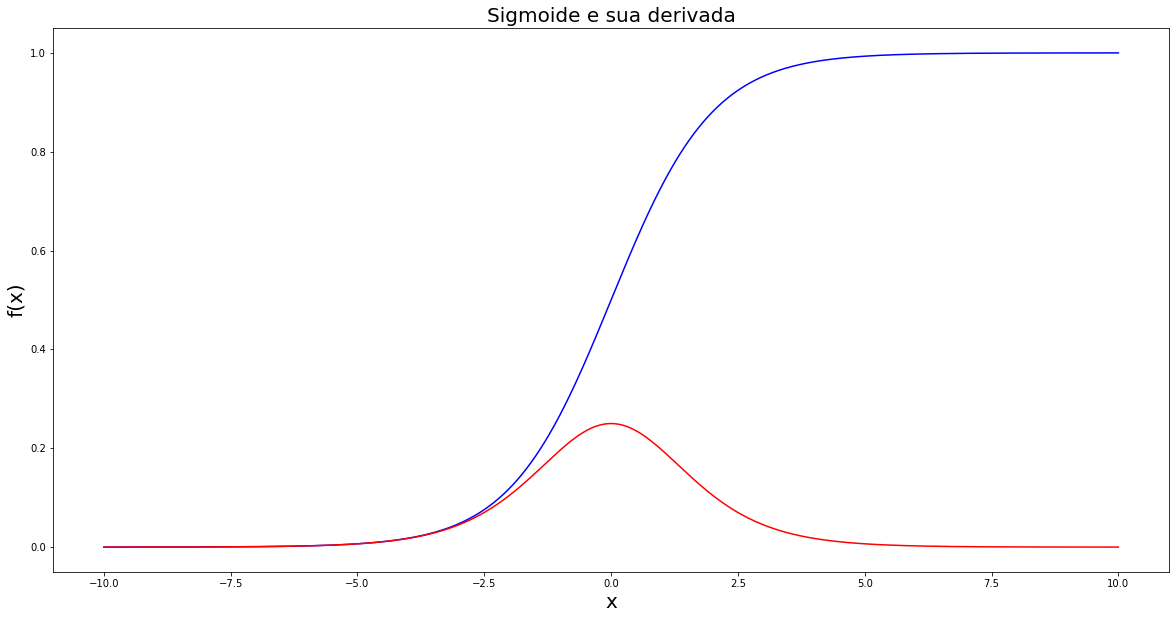

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm

x = np.linspace(-10,10,100000).astype(float)

y = list(map(lambda e: sigmoid(e), x))

dy = list(map(lambda e: sigmoid(e, derivative=True), x))


display(Image(url = "http://www.decom.ufop.br/imobilis/wp-content/uploads/2016/07/sigmoid_eq-300x98.png", width=500, height=350))
print("\n\n")
plt.figure(figsize=(20,10))
plt.plot(x,y,'b',x,dy,'r')
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.title('Sigmoide e sua derivada', fontsize=20)
plt.show()

#### Funcao ReLU (Rectified Linear Unit)

In [198]:
Image(url = 'https://matheusfacure.github.io/img/tutorial/activations/RELU.png')

#### Funcao Tangente Hiperbolica

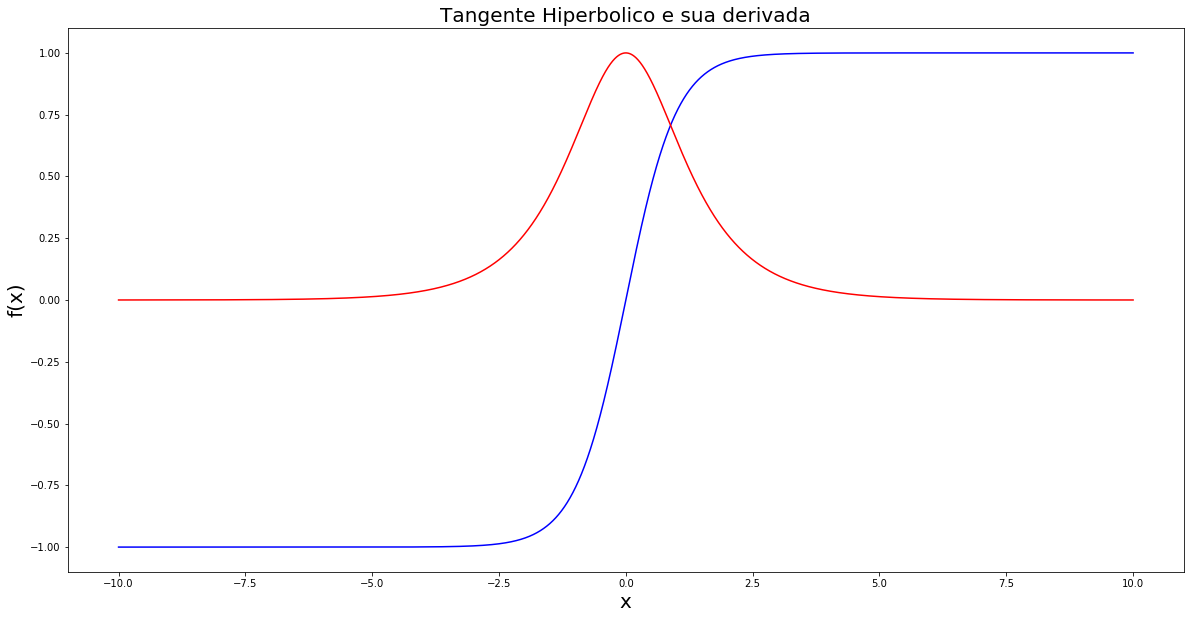

In [39]:
def tgh(x, derivative=False):
    if derivative:
        return 1/(np.cosh(x))
    else:
        return np.tanh(x)
    
x = np.linspace(-10,10,100000).astype(float)

y = list(map(lambda e: tgh(e), x))

dy = list(map(lambda e: tgh(e, derivative=True), x))

display(Image(url = "http://www.decom.ufop.br/imobilis/wp-content/uploads/2016/07/tangent_eq.png", width=500, height=350))
print("\n\n")
plt.figure(figsize=(20,10))
plt.plot(x,y,'b',x,dy,'r')
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.title('Tangente Hiperbolico e sua derivada', fontsize=20)
plt.show()

#### Funcao Softmax

In [40]:
display(Image(url = "http://www.decom.ufop.br/imobilis/wp-content/uploads/2016/07/softmax.png", width=500, height=350))

In [283]:
# Pacotes de Manipulacao de Dados
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
import pandas as pd

# Biblioteca Tensorflow
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Pacotes Complementares
import timeit
import warnings
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure

warnings.filterwarnings("ignore")

### Perceptron com TensorFlow

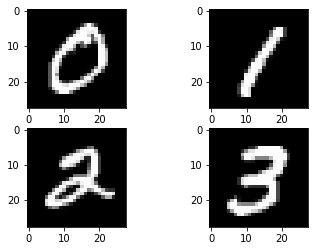

In [284]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [288]:
# Importando MNIST
mnist = input_data.read_data_sets("/media/hiroaki/DATA/dsa/deep-learning-1/datasets/MNIST", one_hot=True)

# Hiperparâmetros
learning_rate = 0.01
training_epochs = 50
batch_size = 64

Extracting /media/hiroaki/DATA/dsa/deep-learning-1/datasets/MNIST/train-images-idx3-ubyte.gz
Extracting /media/hiroaki/DATA/dsa/deep-learning-1/datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting /media/hiroaki/DATA/dsa/deep-learning-1/datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting /media/hiroaki/DATA/dsa/deep-learning-1/datasets/MNIST/t10k-labels-idx1-ubyte.gz


#### Arquitetura 

In [289]:
g = tf.Graph()

n_input = 784
n_classes = 10

with g.as_default():
        
    # Input data
    tf_x = tf.placeholder(tf.float32, [None, n_input])
    tf_y = tf.placeholder(tf.float32, [None, n_classes])

    # Weights and bias
    w_out = tf.Variable(tf.random_normal([n_input, n_classes], stddev=0.1))
    bias_out = tf.Variable(tf.random_normal([n_classes], stddev=0.1))
    out_layer=tf.matmul(tf_x, w_out) + bias_out

    # Loss e optimizer
    loss = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=tf_y)
    cost = tf.reduce_mean(loss)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train = optimizer.minimize(cost)

    # Previsões
    correct_prediction = tf.equal(tf.argmax(tf_y, 1), tf.argmax(out_layer, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    

#### Treinamento e Avaliacao

In [290]:
with tf.Session(graph=g) as sess:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/media/hiroaki/DATA/dsa/deep-learning-1/perceptron", sess.graph)
    sess.run(tf.global_variables_initializer())

    epoch_set=[]
    accuracy_set=[]
    cost_set=[]
    start = timeit.default_timer()
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = mnist.train.num_examples // batch_size

        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            step, c = sess.run([train, cost], feed_dict = {tf_x: batch_x,
                                                              tf_y: batch_y})
            avg_cost += c
        
        train_acc = sess.run(accuracy, feed_dict = {tf_x: mnist.train.images,
                                                        tf_y: mnist.train.labels})
        accuracy_set.append(train_acc)
        epoch_set.append(epoch)
        cost_set.append(avg_cost/ (i + 1))
        
        if i % 10 == 0:
                writer.add_summary(merged_str, i)
          
        
        print("Epoch: %03d | AvgCost: %.3f" % (epoch + 1, avg_cost / (i + 1)), end="")
        print(" | Acurácia em Treino: %.3f" % (train_acc))
    
    stop = timeit.default_timer()
    print("\nTempo de Treinamento: %.2f" %(stop-start))
    test_acc = sess.run(accuracy, feed_dict = {tf_x: mnist.test.images,
                                               tf_y: mnist.test.labels})
    print('Acurácia em Teste: %.3f' % test_acc)

Epoch: 001 | AvgCost: 1.105 | Acurácia em Treino: 0.829
Epoch: 002 | AvgCost: 0.593 | Acurácia em Treino: 0.861
Epoch: 003 | AvgCost: 0.500 | Acurácia em Treino: 0.873
Epoch: 004 | AvgCost: 0.456 | Acurácia em Treino: 0.881
Epoch: 005 | AvgCost: 0.428 | Acurácia em Treino: 0.885
Epoch: 006 | AvgCost: 0.410 | Acurácia em Treino: 0.891
Epoch: 007 | AvgCost: 0.395 | Acurácia em Treino: 0.893
Epoch: 008 | AvgCost: 0.384 | Acurácia em Treino: 0.895
Epoch: 009 | AvgCost: 0.375 | Acurácia em Treino: 0.898
Epoch: 010 | AvgCost: 0.368 | Acurácia em Treino: 0.899
Epoch: 011 | AvgCost: 0.361 | Acurácia em Treino: 0.901
Epoch: 012 | AvgCost: 0.356 | Acurácia em Treino: 0.902
Epoch: 013 | AvgCost: 0.350 | Acurácia em Treino: 0.903
Epoch: 014 | AvgCost: 0.347 | Acurácia em Treino: 0.904
Epoch: 015 | AvgCost: 0.343 | Acurácia em Treino: 0.905
Epoch: 016 | AvgCost: 0.338 | Acurácia em Treino: 0.906
Epoch: 017 | AvgCost: 0.336 | Acurácia em Treino: 0.907
Epoch: 018 | AvgCost: 0.333 | Acurácia em Treino

In [293]:
output_notebook()

p = figure(title="Funcao custo", x_axis_label='epoca',
           plot_height=500, plot_width=900, 
           x_range=(0, len(epoch_set)), y_range=(min(cost_set), max(cost_set)))
r = p.line([], [])
show(p, notebook_handle=True)

def update(losses):
    x = np.arange(len(losses))
    r.data_source.data.update(x=x, y=losses)
    if len(losses) > 0:
        p.x_range.end = 50
        p.y_range.start = min(losses)
    push_notebook()

import time

for i in np.arange(0, len(epoch_set), 1):
    # Pretend we do a step of our optimizer here.
    time.sleep(.1)
    new_losses = cost_set[:i]
    update(new_losses)

Loading BokehJS ...

In [294]:
output_notebook()

p = figure(title="Acuracia", x_axis_label='epoca',
           plot_height=500, plot_width=900, 
           x_range=(0, len(epoch_set)), y_range=(min(accuracy_set), max(accuracy_set)))
r = p.line([], [])
show(p, notebook_handle=True)

def update(accuracy):
    x = np.arange(len(accuracy))
    r.data_source.data.update(x=x, y=accuracy)
    if len(accuracy) > 0:
        p.x_range.end = 50
        p.y_range.start = min(accuracy)
    push_notebook()

import time

for i in range(0, len(epoch_set), 1):
    # Pretend we do a step of our optimizer here.
    time.sleep(.1)
    new_acc = accuracy_set[:i]
    update(new_acc)

Loading BokehJS ...

In [209]:
!(tensorboard --logdir=/media/hiroaki/DATA/dsa/deep-learning-1/perceptron)

/home/hiroaki/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hiroaki/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hiroaki/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hiroaki/anaconda3/lib/python3.7/site-packages/tensor

W0919 17:51:46.690808 139907619178240 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0919 17:51:46.710508 139907619178240 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0919 17:51:46.722479 139907619178240 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0919 17:51:46.756846 139907619178240 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0919 17:51:46.794072 13

### Perceptrons de multiplas camadas com TensorFlow

In [295]:
# Hiperparâmetros
learning_rate = 0.01
training_epochs = 50
batch_size = 64

In [296]:
g = tf.Graph()

n_input = 784
n_hidden_1 = 16
n_hidden_2 = 16
n_classes = 10

with g.as_default():
    
    with tf.name_scope('Parameters'):
        weights = {
            'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1], stddev=0.1), name='w1'),
            'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2], stddev=0.1), name='w2'),
            'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes], stddev=0.1), name='wout')
        }
        biases = {
            'b1': tf.Variable(tf.random_normal([n_hidden_1], stddev=0.1), name='bias1'),
            'b2': tf.Variable(tf.random_normal([n_hidden_2], stddev=0.1), name='bias2'),
            'out': tf.Variable(tf.random_normal([n_classes], stddev=0.1), name='bout')
        }

        tf.summary.histogram('w1', weights['h1'])
        tf.summary.histogram('bias1', biases['b1'])
        tf.summary.histogram('w2', weights['h2'])
        tf.summary.histogram('bias2', biases['b2'])
        tf.summary.histogram('wout', weights['out'])
        tf.summary.histogram('bout', biases['out'])
    
    
    with tf.name_scope('Camada_de_entrada'):
        # Input data
        tf_x = tf.placeholder(tf.float32, [None, n_input], name='x')
        tf_y = tf.placeholder(tf.float32, [None, n_classes], name='y')

    # Multilayer Perceptron
    with tf.name_scope('Primeira_camada'):
        layer_1_multiplication = tf.matmul(tf_x, weights['h1'])
        layer_1_addition = tf.add(layer_1_multiplication, biases['b1'])
        layer_1_activation = tf.nn.relu(layer_1_addition)

    with tf.name_scope('Segunda_camada'):
        layer_2_multiplication = tf.matmul(layer_1_activation, weights['h2'])
        layer_2_addition = tf.add(layer_2_multiplication, biases['b2'])
        layer_2_activation = tf.nn.relu(layer_2_addition)
    
    with tf.name_scope('Camada_de_saida'):
        out_layer = tf.matmul(layer_2_activation,weights['out']) + biases['out']

    # Loss e optimizer
    with tf.name_scope("Erros"):
        loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=out_layer, labels=tf_y)
        cost = tf.reduce_mean(tf.cast(loss, tf.float32))
        
    with tf.name_scope('Treinamento'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        train = optimizer.minimize(cost)

    # Previsões
    with tf.name_scope("Acuracia"):
        correct_prediction = tf.equal(tf.argmax(tf_y, 1), tf.argmax(out_layer, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [300]:
with tf.Session(graph=g) as sess:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/media/hiroaki/DATA/dsa/deep-learning-1/perceptrons", sess.graph)
    sess.run(tf.global_variables_initializer())
    
    saver = tf.train.Saver()

    epoch_set=[]
    accuracy_set=[]
    cost_set=[]
    start = timeit.default_timer()
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = mnist.train.num_examples // batch_size

        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            c, merged_str, step = sess.run([cost, merged, train], feed_dict = {tf_x: batch_x,tf_y: batch_y})
            avg_cost += c
            
            if i % 10 == 0:
                writer.add_summary(merged_str, i)
                
        train_acc = sess.run(accuracy, feed_dict = {tf_x: mnist.train.images,
                                                        tf_y: mnist.train.labels})
        accuracy_set.append(train_acc)
        epoch_set.append(epoch)
        cost_set.append(avg_cost/ (i + 1))
        print("Epoch: %03d | AvgCost: %.3f" % (epoch + 1, avg_cost / (i + 1)), end="")
        print(" | Acurácia em Treino: %.3f" % (train_acc))

    
    stop = timeit.default_timer()
    print("\nTempo de Treinamento: %.2f" %(stop-start))
    test_acc = sess.run(accuracy, feed_dict = {tf_x: mnist.test.images,
                                               tf_y: mnist.test.labels})
    print('Acurácia: %.3f' % test_acc)
    
    saver.save(sess, "/media/hiroaki/DATA/dsa/deep-learning-1/modelos/mlp")
    
writer.close()

Epoch: 001 | AvgCost: 2.156 | Acurácia em Treino: 0.403
Epoch: 002 | AvgCost: 1.231 | Acurácia em Treino: 0.758
Epoch: 003 | AvgCost: 0.660 | Acurácia em Treino: 0.829
Epoch: 004 | AvgCost: 0.526 | Acurácia em Treino: 0.855
Epoch: 005 | AvgCost: 0.464 | Acurácia em Treino: 0.871
Epoch: 006 | AvgCost: 0.418 | Acurácia em Treino: 0.886
Epoch: 007 | AvgCost: 0.384 | Acurácia em Treino: 0.894
Epoch: 008 | AvgCost: 0.360 | Acurácia em Treino: 0.898
Epoch: 009 | AvgCost: 0.341 | Acurácia em Treino: 0.904
Epoch: 010 | AvgCost: 0.323 | Acurácia em Treino: 0.909
Epoch: 011 | AvgCost: 0.310 | Acurácia em Treino: 0.913
Epoch: 012 | AvgCost: 0.296 | Acurácia em Treino: 0.913
Epoch: 013 | AvgCost: 0.286 | Acurácia em Treino: 0.918
Epoch: 014 | AvgCost: 0.275 | Acurácia em Treino: 0.922
Epoch: 015 | AvgCost: 0.266 | Acurácia em Treino: 0.924
Epoch: 016 | AvgCost: 0.255 | Acurácia em Treino: 0.927
Epoch: 017 | AvgCost: 0.249 | Acurácia em Treino: 0.929
Epoch: 018 | AvgCost: 0.241 | Acurácia em Treino

In [301]:
output_notebook()

p = figure(title="Funcao custo", x_axis_label='epoca',
           plot_height=500, plot_width=900, 
           x_range=(0, len(epoch_set)), y_range=(min(cost_set), max(cost_set)))
r = p.line([], [])
show(p, notebook_handle=True)

def update(losses):
    x = np.arange(len(losses))
    r.data_source.data.update(x=x, y=losses)
    if len(losses) > 0:
        p.x_range.end = 50
        p.y_range.start = min(losses)
    push_notebook()

import time

for i in np.arange(0, len(epoch_set), 1):
    # Pretend we do a step of our optimizer here.
    time.sleep(.1)
    new_losses = cost_set[:i]
    update(new_losses)

Loading BokehJS ...

In [302]:
output_notebook()

p = figure(title="Acuracia", x_axis_label='epoca',
           plot_height=500, plot_width=900, 
           x_range=(0, len(epoch_set)), y_range=(min(accuracy_set), max(accuracy_set)))
r = p.line([], [])
show(p, notebook_handle=True)

def update(accuracy):
    x = np.arange(len(accuracy))
    r.data_source.data.update(x=x, y=accuracy)
    if len(accuracy) > 0:
        p.x_range.end = 50
        p.y_range.start = min(accuracy)
    push_notebook()

import time

for i in range(0, len(epoch_set), 1):
    # Pretend we do a step of our optimizer here.
    time.sleep(.1)
    new_acc = accuracy_set[:i]
    update(new_acc)

Loading BokehJS ...

In [303]:
!(tensorboard --logdir=/media/hiroaki/DATA/dsa/deep-learning-1/perceptrons)

/home/hiroaki/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hiroaki/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hiroaki/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hiroaki/anaconda3/lib/python3.7/site-packages/tensor

I0919 19:48:28.101756 140480813201152 _internal.py:122] ::ffff:127.0.0.1 - - [19/Sep/2019 19:48:28] "GET /data/plugin/histograms/histograms?run=.&tag=Parameters%2Fbout_1 HTTP/1.1" 200 -
I0919 19:48:28.135431 140478951438080 _internal.py:122] ::ffff:127.0.0.1 - - [19/Sep/2019 19:48:28] "GET /data/plugin/histograms/histograms?run=.&tag=Parameters%2Fwout_1 HTTP/1.1" 200 -
I0919 19:48:28.138138 140478985008896 _internal.py:122] ::ffff:127.0.0.1 - - [19/Sep/2019 19:48:28] "GET /data/plugin/histograms/histograms?run=.&tag=Parameters%2Fw2_1 HTTP/1.1" 200 -
I0919 19:48:28.145979 140480855148288 _internal.py:122] ::ffff:127.0.0.1 - - [19/Sep/2019 19:48:28] "GET /data/plugin/histograms/histograms?run=.&tag=Parameters%2Fw1_1 HTTP/1.1" 200 -
^C


## Referencias

https://matheusfacure.github.io/2017/07/12/activ-func/

http://deeplearningbook.com.br/funcao-de-ativacao/

https://medium.com/@dehhmesquita/classificando-textos-com-redes-neurais-e-tensorflow-5063784a1b31

https://www.datascienceacademy.com.br/

https://gist.github.com/tsbertalan/31e11f36683deef6572d14a14c400f51